In [1]:
import pandas as pd
import numpy as np

In [2]:
def createGap(df,start,end):

    #df = readData()
    l = len(df.index)
    if end>l:
        end = l
        
    for i in range(start,end):
        df['GlucoseValue'][i]=0
    
    
    return df

def detectGap(testing_data):

        l = []
        k = -1
        for i in testing_data['GlucoseValue']:
            k+=1
            if i==0:
                l.append(k)
        b = min(l)
        e = max(l)
        #print(b,e)
        gap=e-b
        # print("Gap detected!")
        return b,e,gap

In [3]:
def index_agreement(o,s):
        
    ia = 1 -(np.sum((o-s)**2))/(np.sum((np.abs(s-np.mean(o))+np.abs(o-np.mean(o)))**2))

    return ia

In [466]:
df = pd.read_csv('GlucoCheck/Data/consolidatedDataForPackage.csv')     
df['Display Time'] = df['Display Time'].apply(lambda x: pd.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
test_df = df[df['subjectId']=='1636-69-032']
# data = data.set_index(['Display Time'], drop=True)
df.drop(['subjectId'], axis=1, inplace=True)
test_df.drop(['subjectId'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [467]:

df.append(test_df)
test_df = test_df[1200:]

In [468]:
df

,Display Time,GlucoseValue
0,2016-06-21 00:00:00,197.0
1,2016-06-21 00:15:00,208.0
2,2016-06-21 00:30:00,226.0
3,2016-06-21 00:45:00,241.0
4,2016-06-21 01:00:00,250.0
...,...,...
316522,2025-06-28 23:36:00,206.0
316523,2025-06-28 23:41:00,208.0
316524,2025-06-28 23:46:00,213.0
316525,2025-06-28 23:51:00,224.0


In [473]:
xx = pd.read_csv('GlucoCheck/Data/consolidatedDataForPackage.csv') 
xx = xx[xx['subjectId']=='1636-69-032']
xx = xx[:1200]
xx = xx.tail(583)
xx

,Display Time,GlucoseValue,subjectId
52074,2016-01-15 16:23:07,112.0,1636-69-032
52075,2016-01-15 16:28:07,111.0,1636-69-032
52076,2016-01-15 16:33:07,110.0,1636-69-032
52077,2016-01-15 16:38:07,109.0,1636-69-032
52078,2016-01-15 16:43:07,104.0,1636-69-032
...,...,...,...
52652,2016-01-17 16:32:58,106.0,1636-69-032
52653,2016-01-17 16:37:58,106.0,1636-69-032
52654,2016-01-17 16:42:58,105.0,1636-69-032
52655,2016-01-17 16:47:58,106.0,1636-69-032


In [500]:
z = xx['GlucoseValue'].tolist()
test_df['GlucoseValue'] = z
test_df

,Display Time,GlucoseValue
52657,2016-01-17 16:57:58,112.0
52658,2016-01-17 17:02:58,111.0
52659,2016-01-17 17:07:58,110.0
52660,2016-01-17 17:12:58,109.0
52661,2016-01-17 17:17:58,104.0
...,...,...
53235,2016-01-19 17:12:49,106.0
53236,2016-01-19 17:17:49,106.0
53237,2016-01-19 17:22:49,105.0
53238,2016-01-19 17:27:49,106.0


In [501]:
from sklearn.preprocessing import MinMaxScaler
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(columns=['Date', 'GV'])
new_data['Date'] = data['Display Time']
new_data['GV'] = data['GlucoseValue']

test = test_df.sort_index(ascending=True, axis=0)
test_data = pd.DataFrame(columns=['Date', 'GV'])
test_data['Date'] = test['Display Time']
test_data['GV'] = test['GlucoseValue']



In [502]:
# new_data
test_data

,Date,GV
52657,2016-01-17 16:57:58,112.0
52658,2016-01-17 17:02:58,111.0
52659,2016-01-17 17:07:58,110.0
52660,2016-01-17 17:12:58,109.0
52661,2016-01-17 17:17:58,104.0
...,...,...
53235,2016-01-19 17:12:49,106.0
53236,2016-01-19 17:17:49,106.0
53237,2016-01-19 17:22:49,105.0
53238,2016-01-19 17:27:49,106.0


In [503]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
dataset = new_data.values

test_data.index = test_data.Date
test_data.drop('Date', axis=1, inplace=True)
test_set = test_data.values

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(dataset)
train = scaled_data


scaled_test = scaler.fit_transform(test_set)
valid = scaled_test



In [504]:
# dataset

In [505]:
x_train,y_train=[],[]
for i in range(1,train.shape[0]):
    x_train.append(train[i-1:i,0])
    y_train.append(train[i,0])

# for z in range(60,valid.shape[0]):
#     x_test.append(valid[z-60:z,0])
#     y_test.append(valid[z,0])



In [506]:
# x_train, y_train,x_test,y_test = np.array(x_train), np.array(y_train),np.array(x_test),np.array(y_test)
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [507]:
# x_train

In [508]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from keras.optimizers import Adam
model = Sequential()
model.add(LSTM(units=100,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(1))
ADAM = Adam(0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=ADAM)
history = model.fit(x_train,y_train,epochs=3,batch_size=72,verbose=1,shuffle=False)


Epoch 1/3
316526/316526 [==============================] - 45s 143us/step - loss: 0.0013
Epoch 2/3
316526/316526 [==============================] - 42s 132us/step - loss: 3.7912e-04
Epoch 3/3
316526/316526 [==============================] - 43s 135us/step - loss: 3.6322e-04


In [509]:
x_test = []
for z in range(1,valid.shape[0]):
    x_test.append(valid[z-1:z,0])
#     y_test.append(valid[z,0])

x_test = np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [510]:
len(x_test)


582

In [511]:
# x_test

In [512]:
c = model.predict(x_test)

In [513]:
len(c)

582

In [514]:
b = scaler.inverse_transform(c)

In [515]:
a= test_df.GlucoseValue[:582]

In [516]:
len(a),len(b)

(582, 582)

In [517]:
res = pd.DataFrame(columns=['X', 'Y'])
res.X = a
res.Y = np.round(b)
res

,X,Y
52657,112.0,112.0
52658,111.0,111.0
52659,110.0,111.0
52660,109.0,110.0
52661,104.0,105.0
...,...,...
53234,106.0,107.0
53235,106.0,107.0
53236,106.0,107.0
53237,105.0,106.0


In [518]:
index_agreement(np.asarray(res.X),np.asarray(res.Y))

0.9990334810829278

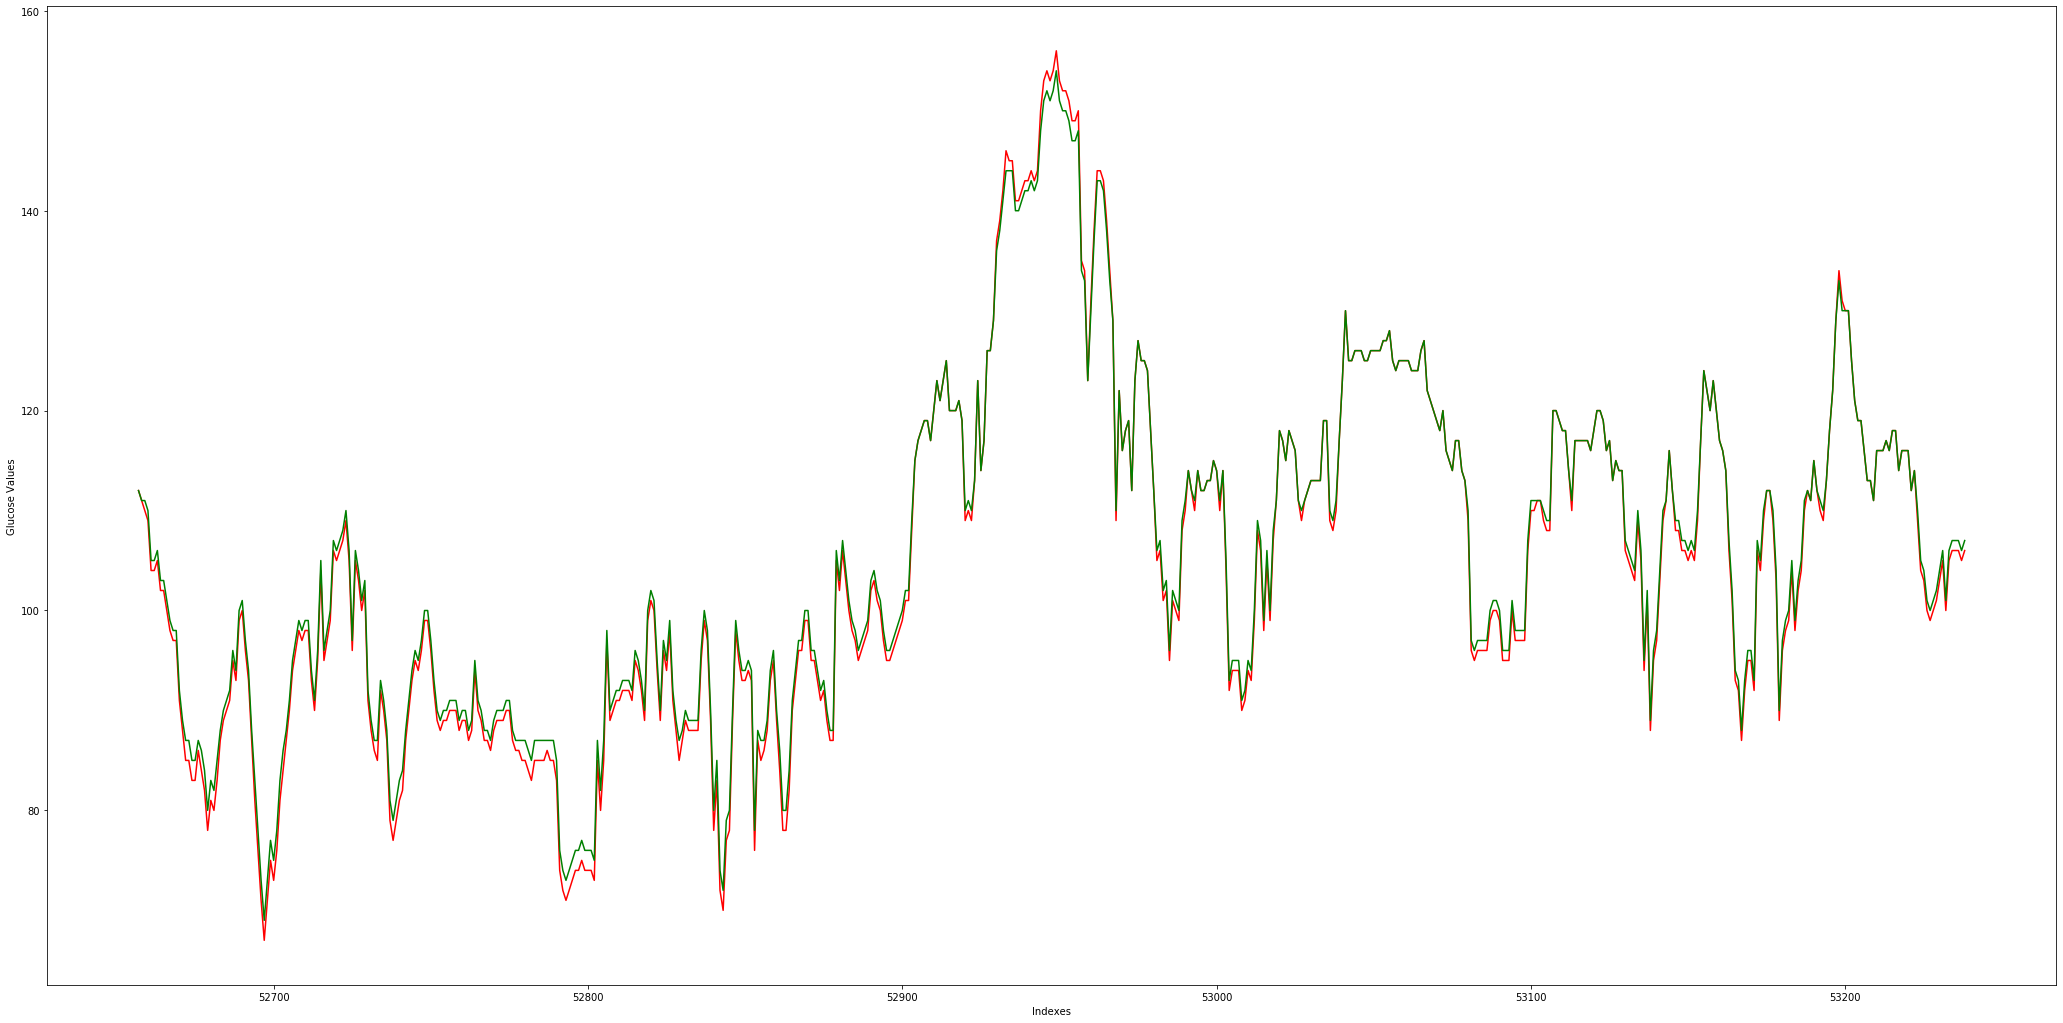

In [520]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(36, 18))
plt.plot(res.X, color='red')
plt.plot(res.Y, color='green')

plt.xlabel('Indexes')
plt.ylabel('Glucose Values')
plt.show()